In [1]:
import os
import h5py
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
data_path = '/home/pjarosik/data/simulated/piston'

In [3]:
def trim_close_to_zeros(x):
    # trims LEADING values, which are close to zero
    eps = 1e-10
    nz = np.where(np.abs(x) > eps)[0]
    return x[nz[0]:]

def standardize(x):
    return (x-np.mean(x))/np.std(x)

Read some data.

In [4]:
with h5py.File(os.path.join(data_path, 'att01.mat')) as f:
    rf = f['rf']
    print("Matrix shape: %s" % str(rf.shape))
    print("Data type: %s" % str(rf.dtype))
    # plt.plot(rf)

Matrix shape: (1024, 7107)
Data type: float64


1. filename att{xx}.mat, $\alpha=xx^{-1}$;
1. each file contains 1024 scanlines; each scanline is generated for randomly located points (polar coordinates and depth: (r, $\phi$, z) generated from $U^3$ --> cartesian coordinates)  
1. fs=100e6, c=1540 => depth $\approx$ 50e-3 [m]  

Example scanline ($\alpha$=.1):

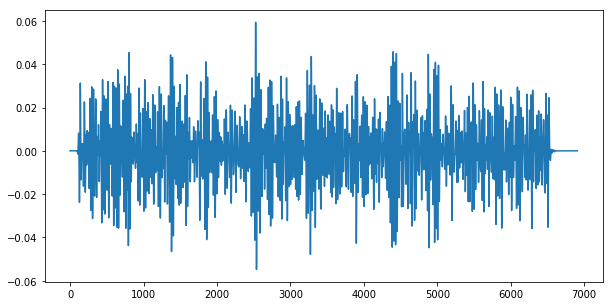

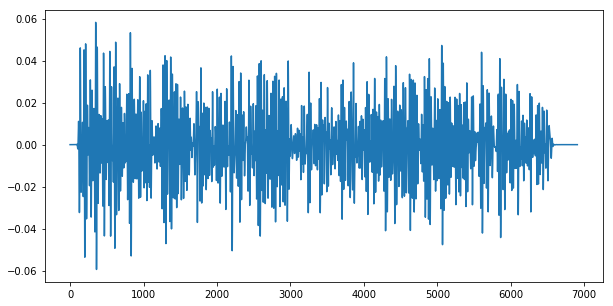

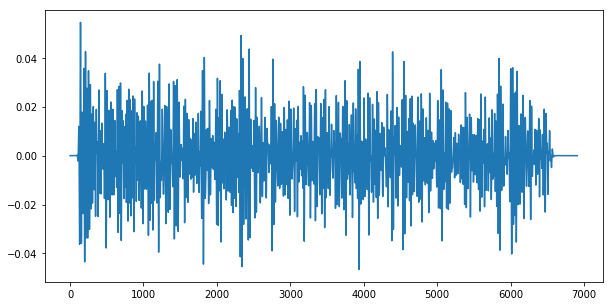

In [5]:
with h5py.File(os.path.join(data_path, 'att01.mat')) as f:
    rf = f['rf']
    lines = random.sample(range(rf.shape[0]), 3)
    for line in lines:
        plt.figure(figsize=(10, 5))
        plt.plot(trim_close_to_zeros(rf[line]))
        plt.show()

Example scanline ($\alpha$=.7):

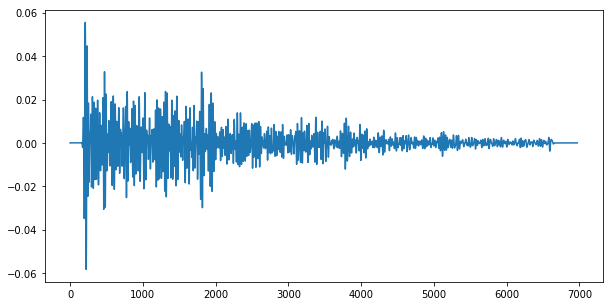

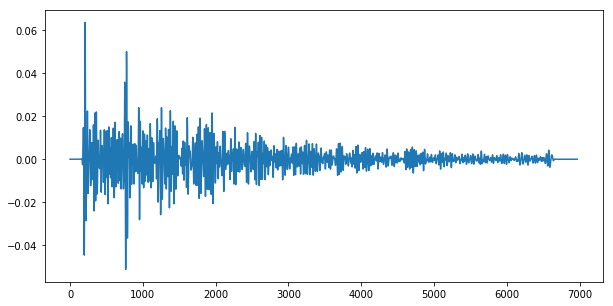

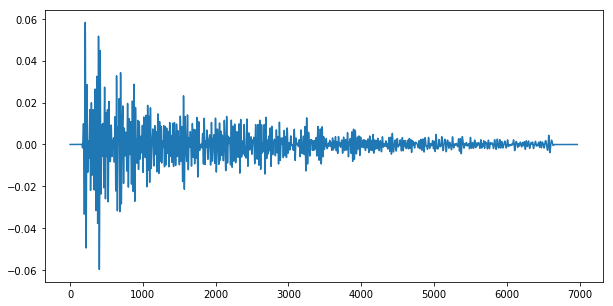

In [6]:
with h5py.File(os.path.join(data_path, 'att07.mat')) as f:
    rf = f['rf']
    lines = random.sample(range(rf.shape[0]), 3)
    for line in lines:
        plt.figure(figsize=(10, 5))
        plt.plot(trim_close_to_zeros(rf[line]))
        plt.show()

Example scanline ($\alpha$=1.5):

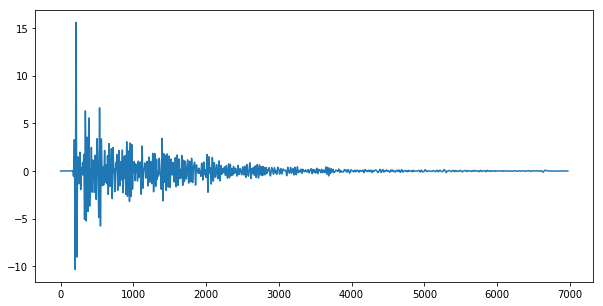

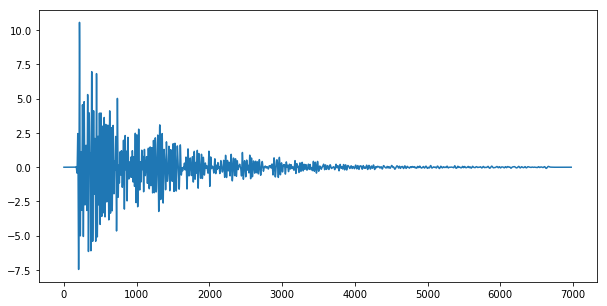

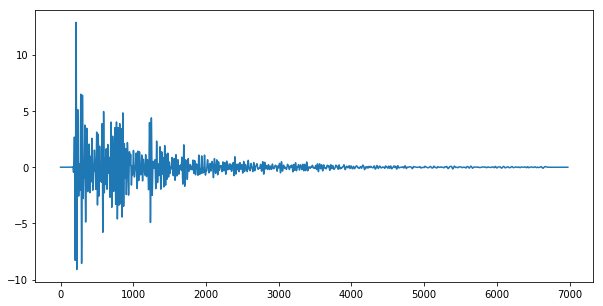

In [7]:
with h5py.File(os.path.join(data_path, 'att15.mat')) as f:
    rf = f['rf']
    lines = (1,2,3) #random.sample(range(rf.shape[0]), 3)
    for line in lines:
        plt.figure(figsize=(10, 5))
        plt.plot(standardize(trim_close_to_zeros(rf[line])))
        plt.show()

Total shape: (138240, 1300)
Chunk shape: (9, 1300)
Chunk ids: [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
line: [6151 6151 6151 6151 6151 6151 6151 6151 6151]


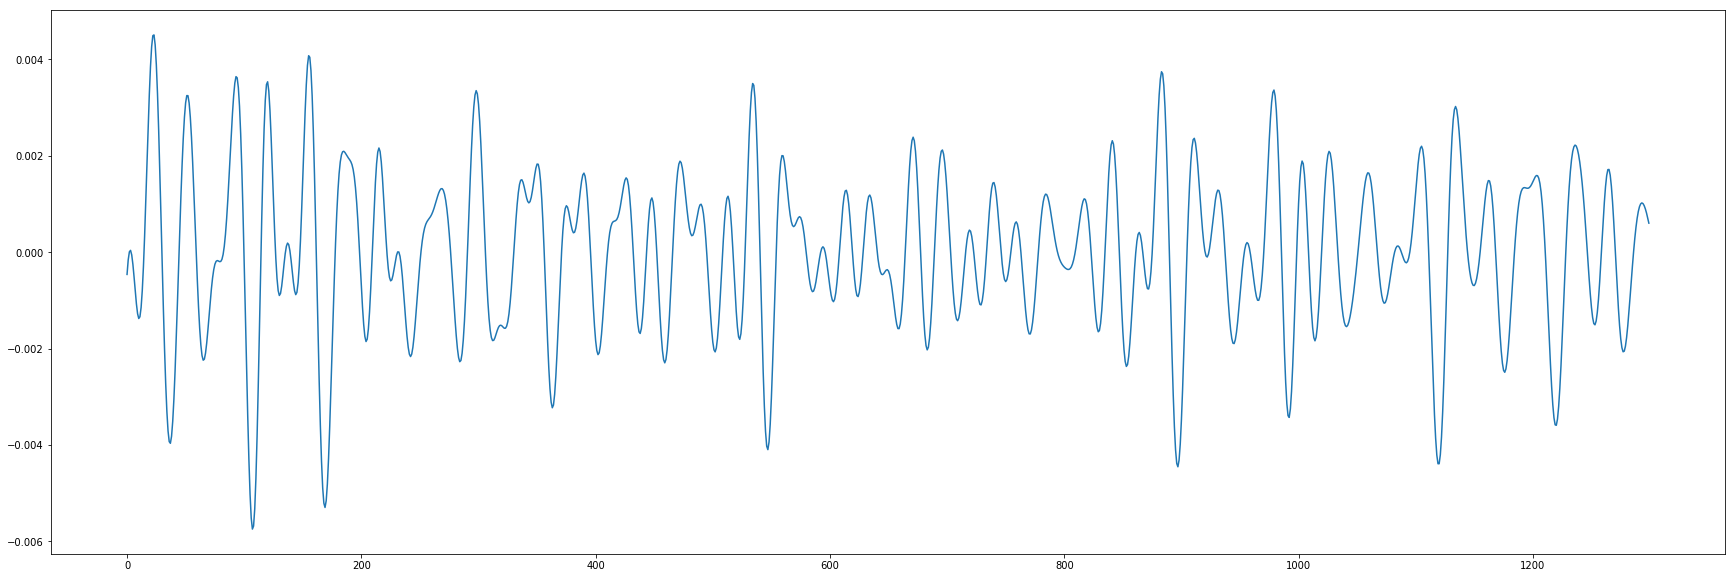

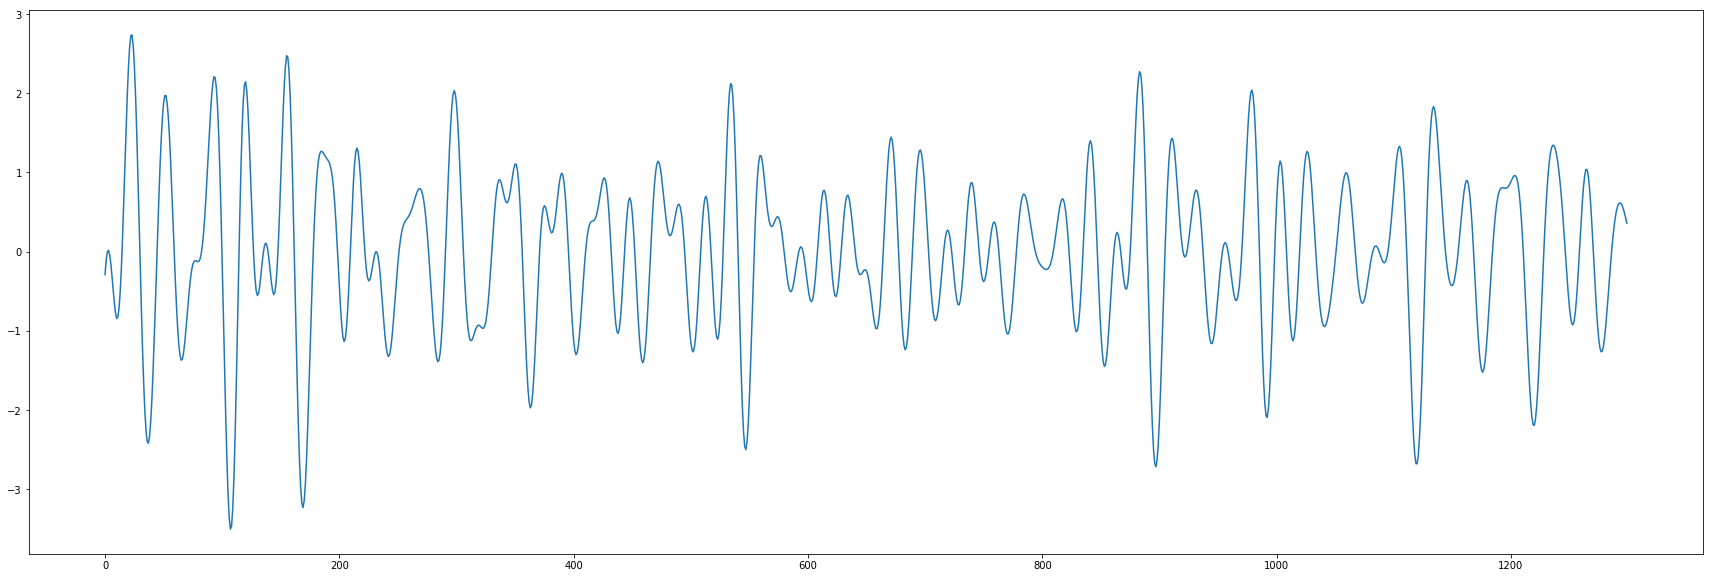

In [12]:
# Check prepared chunks.
plt.figure(figsize=(30, 10))
chunk_n = 7
att = 7
line_id = 7
with h5py.File('/home/pjarosik/data/simulated/piston/att%02d.mat' % att, 'r') as f:
    line = trim_close_to_zeros(f['rf'][line_id])
    plt.plot(line[chunk_n*650:chunk_n*650+1300])
    
plt.figure(figsize=(30, 10))    
with h5py.File('/home/pjarosik/data/simulated/piston/1cm.hdf5', 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    line_ids = ids[chunk_idx]
    print("Chunk shape: %s" % str(line_chunks.shape))
    print("Chunk ids: %s" % str(line_att))
    print("line: %s" % str(line_ids))
    plt.plot(line_chunks[chunk_n])